C:\Users\shark\AppData\Local\Temp\ipykernel_1204\2523349699.py:39: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='X1', y='X2', data=data, s=50, palette='viridis')


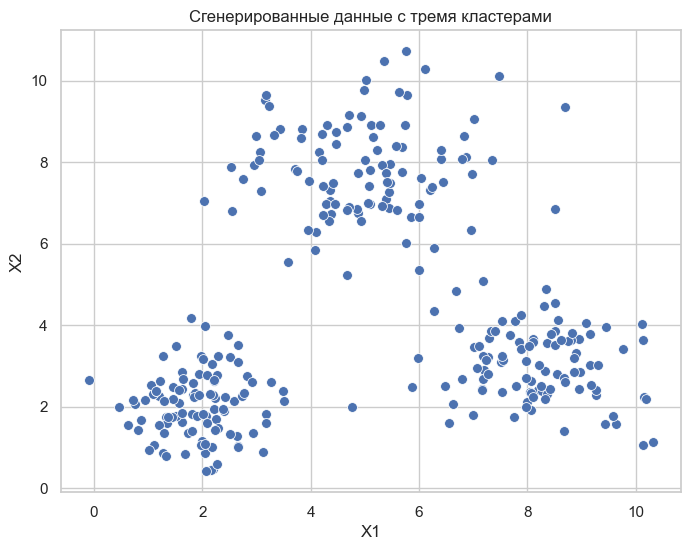


Определение оптимального числа кластеров с использованием метода локтя:
Сходимость достигнута на итерации 2
K=1, SSE=4454.6483
Сходимость достигнута на итерации 5
K=2, SSE=2554.9226
Сходимость достигнута на итерации 4
K=3, SSE=580.1818
Сходимость достигнута на итерации 5
K=4, SSE=482.2780
Сходимость достигнута на итерации 8
K=5, SSE=409.7175
Сходимость достигнута на итерации 11
K=6, SSE=378.2986
Сходимость достигнута на итерации 15
K=7, SSE=314.7992
Сходимость достигнута на итерации 18
K=8, SSE=295.9192
Сходимость достигнута на итерации 18
K=9, SSE=254.7477
Сходимость достигнута на итерации 20
K=10, SSE=222.4777


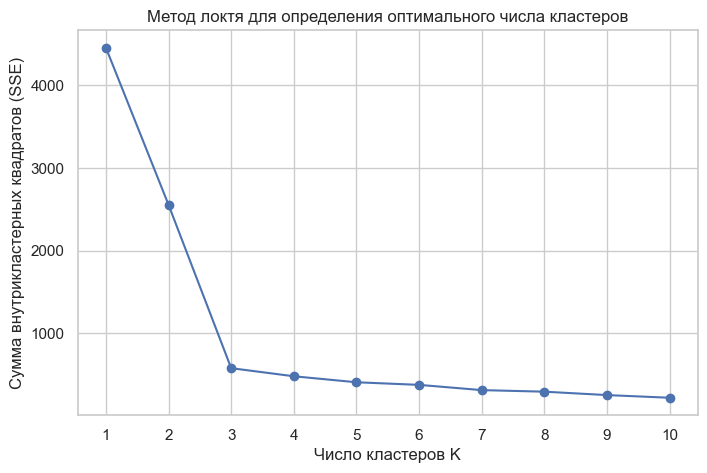


Применение алгоритма K-средних с K=3:
Сходимость достигнута на итерации 4

Первые 5 строк данных с назначенными кластерами:
         X1        X2  Cluster
0  2.397371  1.889389        1
1  2.518151  3.218424        1
2  1.812677  1.812690        1
3  3.263370  2.613948        1
4  1.624420  2.434048        1


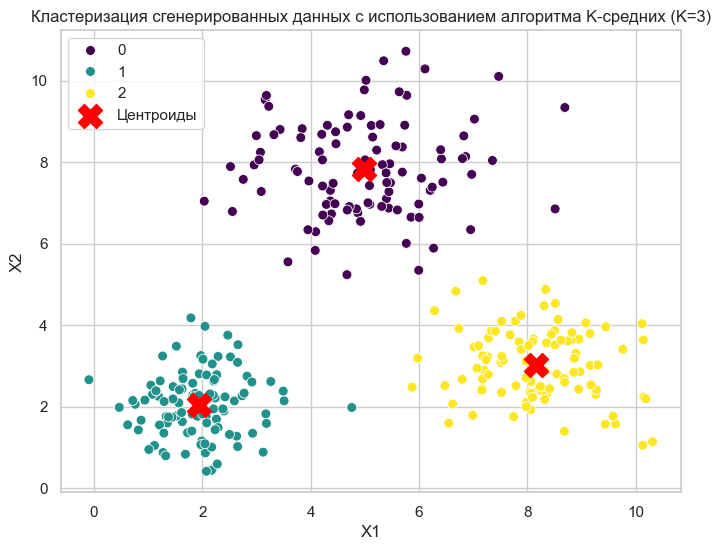


Коэффициент силуэта: 0.6985


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score

# Установка стиля графиков
sns.set(style="whitegrid")

# Этап 0. Генерация данных

# Параметры генерации данных
np.random.seed(42)  # Для воспроизводимости
m = 300  # Общее количество точек
k_true = 3  # Истинное число кластеров

# Определение центров кластеров
centers = np.array([
    [2, 2],
    [8, 3],
    [5, 8]
])

# Стандартное отклонение для каждого кластера
std_devs = [0.8, 1.0, 1.2]

# Генерация данных
X = []
for i in range(k_true):
    cluster_points = np.random.normal(loc=centers[i], scale=std_devs[i], size=(m // k_true, 2))
    X.append(cluster_points)
X = np.vstack(X)

# Создание DataFrame для удобства работы
data = pd.DataFrame(X, columns=['X1', 'X2'])

# Визуализация сгенерированных данных
plt.figure(figsize=(8,6))
sns.scatterplot(x='X1', y='X2', data=data, s=50, palette='viridis')
plt.title('Сгенерированные данные с тремя кластерами')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Этап 1. Реализация алгоритма K-средних

def initialize_centroids(X, k):
    """
    Инициализация центроидов путем случайного выбора K объектов из набора данных.
    """
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def compute_euclidean_distance(a, b):
    """
    Вычисление евклидового расстояния между объектами и центроидом.
    """
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

def assign_clusters(X, centroids):
    """
    Назначение каждого объекта к ближайшему центроиду.
    """
    distances = np.array([compute_euclidean_distance(X, centroid) for centroid in centroids]).T
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    """
    Перерасчет центроидов как среднего значения объектов в каждом кластере.
    """
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def k_means(X, k, max_iters=100, tol=1e-4):
    """
    Реализация алгоритма K-средних.
    """
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        # Проверка сходимости
        if np.all(np.abs(new_centroids - centroids) < tol):
            print(f"Сходимость достигнута на итерации {i+1}")
            break
        centroids = new_centroids
    return labels, centroids

# Подготовка данных для кластеризации
X_data = data.values  # Используем сгенерированные данные

# Определение диапазона K для метода локтя
K_range = range(1, 11)
SSE = []

print("\nОпределение оптимального числа кластеров с использованием метода локтя:")
for k in K_range:
    labels_k, centroids_k = k_means(X_data, k)
    sse_k = 0
    for i in range(k):
        cluster_points = X_data[labels_k == i]
        sse_k += np.sum((cluster_points - centroids_k[i]) ** 2)
    SSE.append(sse_k)
    print(f"K={k}, SSE={sse_k:.4f}")

# Визуализация метода локтя
plt.figure(figsize=(8,5))
plt.plot(K_range, SSE, marker='o')
plt.xlabel('Число кластеров K')
plt.ylabel('Сумма внутрикластерных квадратов (SSE)')
plt.title('Метод локтя для определения оптимального числа кластеров')
plt.xticks(K_range)
plt.grid(True)
plt.show()

# Выбор K=3 и применение алгоритма K-средних
K = 3
print(f"\nПрименение алгоритма K-средних с K={K}:")
labels, centroids = k_means(X_data, K)

# Добавление меток кластеров в DataFrame для визуализации
data['Cluster'] = labels

# Просмотр первых нескольких строк с кластерами
print("\nПервые 5 строк данных с назначенными кластерами:")
print(data.head())

# Визуализация кластеров по двум признакам
plt.figure(figsize=(8,6))
sns.scatterplot(x='X1', y='X2', hue='Cluster', palette='viridis', data=data, s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Центроиды')
plt.title(f'Кластеризация сгенерированных данных с использованием алгоритма K-средних (K={K})')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

# Оценка качества кластеризации с использованием коэффициента силуэта
sil_score = silhouette_score(X_data, labels)
print(f'\nКоэффициент силуэта: {sil_score:.4f}')
